In [1]:
from bestreads.models import cnn
import pandas as pd
from tensorflow import keras
import tensorflow as tf

# Generate Training and Test Dataset Split

In [ ]:
data = pd.read_csv('./data/goodreads_books.csv')

cnn.split_train_test_data(data, test_frac=0.2)

## Create the Model

In [2]:
model = cnn.build_cnn()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 74, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 72, 128)      73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 70, 128)      147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 33, 64)        73792     
_________________________________________________________________
flatten (Flatten)            (None, 122496)            0

## Split Train and Validation Datasets

In [3]:
train_dataset, val_dataset = cnn.get_train_val_datasets(val_frac=0.15)

## Train Model

In [4]:
print(tf.test.is_gpu_available())
history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=val_dataset)

True
Epoch 1/10
934/934 [==============================] - 486s 520ms/step - loss: 0.3009 - val_loss: 0.0000e+00
Epoch 2/10
934/934 [==============================] - 233s 249ms/step - loss: 0.1305 - val_loss: 0.0817
Epoch 3/10
934/934 [==============================] - 229s 245ms/step - loss: 0.0988 - val_loss: 0.0815
Epoch 4/10
934/934 [==============================] - 233s 249ms/step - loss: 0.0860 - val_loss: 0.0812
Epoch 5/10
934/934 [==============================] - 206s 220ms/step - loss: 0.0821 - val_loss: 0.0813
Epoch 6/10
934/934 [==============================] - 217s 232ms/step - loss: 0.0810 - val_loss: 0.0812
Epoch 7/10
934/934 [==============================] - 213s 228ms/step - loss: 0.0807 - val_loss: 0.0811
Epoch 8/10
934/934 [==============================] - 221s 236ms/step - loss: 0.0807 - val_loss: 0.0812
Epoch 9/10
934/934 [==============================] - 218s 233ms/step - loss: 0.0806 - val_loss: 0.0812
Epoch 10/10
934/934 [==============================] - 

## Save model

In [8]:
cnn.save_model(model, save_dir = './models/')

ERROR! Session/line number was not unique in database. History logging moved to new session 32


ERROR! Session/line number was not unique in database. History logging moved to new session 31


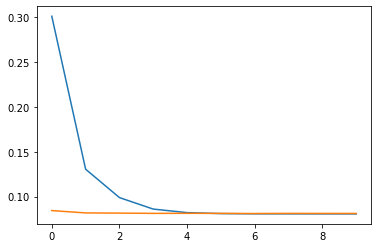

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])